In [1]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r"C:\Users\jasai\Downloads\CTA_-_Ridership_-_Daily_Boarding_Totals.csv")
# 'M' = 1, T = 2, ... Su= 7
Days_of_weeks = ['1', '2', '3', '4', '5', '6', '7']
day_of_week = list()
year = list()
ind = 0
for i in range(len(data)):
    if ind == 7:
        ind = 0
    day_of_week.append(Days_of_weeks[ind])
    year.append(int(data['service_date'][i][len(data['service_date'][i]) - 4 :len(data['service_date'][i])]))
    ind += 1
data['Day'] = day_of_week
data['Year'] = year
data = data[data['Year'] < 2013]
exp_valve = data.groupby('Day')['total_rides'].mean()
exp_valve.to_csv("signcurve.csv")

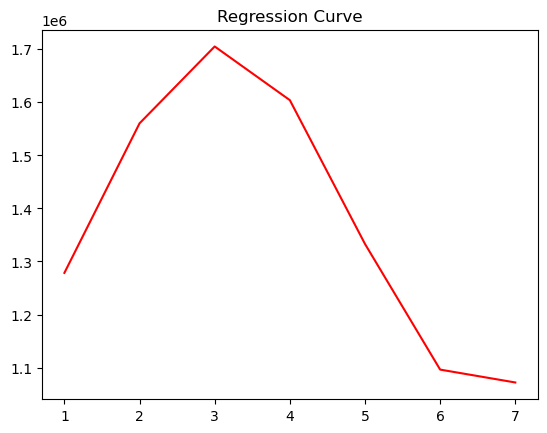

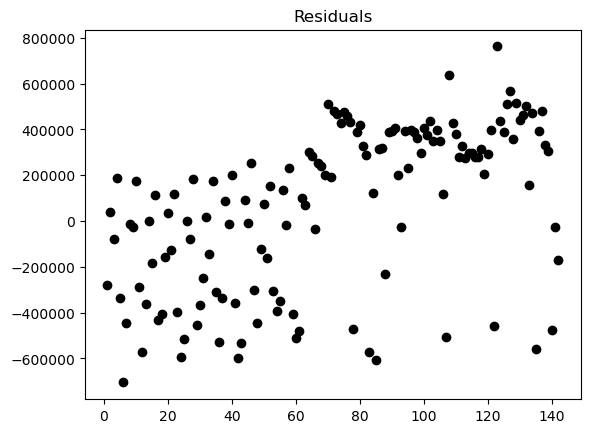

0.509090909090909 0.49090909090909096 0.313953488372093 0.686046511627907


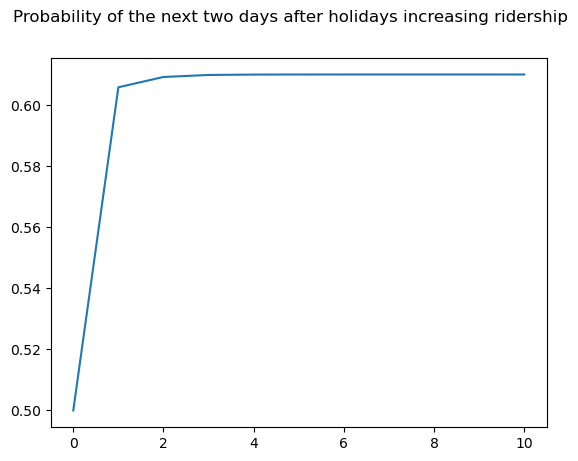

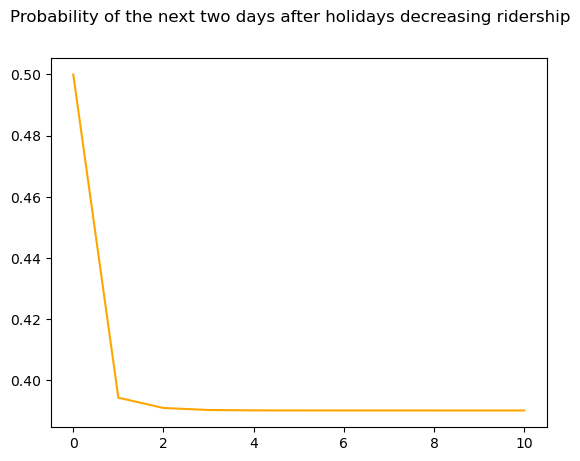

In [46]:
#Coefficients: 1378493.092 -306562.9737 116603.4777
r = list()
for e in range(1, 8):    
    g = 1378493.092 - 306562.9737 * m.cos(2*m.pi*e/7) + 116603.4777 * m.sin(2*m.pi*e/7)
    r.append(g)

plt.plot(range(1, 8), r, color='Red')
plt.title("Regression Curve")
plt.show()

ind = 0
red = list()
for i in range(len(data)):
    if i == 3925:
        i += 1
    if data["day_type"][i] == 'U' and data["Day"][i] != "7":
        red.append(data["total_rides"][i + 1] - r[int(data["Day"][i])])

plt.scatter(range(1, len(red) + 1), red, color='Black')
plt.title("Residuals")
plt.show()

p1 = 0
p2 = 0
p11 = 0
p22 = 0
for i in range(len(red) - 1):
    if red[i] < 0:
        p1 += 1
    else:
        p2 += 1
    if red[i] < 0 and red[i + 1] < 0:
        p11 += 1
    if red[i] > 0 and red[i + 1] > 0:
        p22 += 1
        
p11 = p11 / p1
p22 = p22 / p2

print(p11, 1-p11, 1-p22, p22) 
P=np.array([[p11, 1-p11],[1-p22, p22]])

pi_0=np.array([0.5, 0.5])
 

pi=[]
pi.append(pi_0)
 
P_mul=P.copy()
 

for i in range(10):
    P_mul=np.matmul(P_mul,P)
    pi_t = np.matmul(pi_0,P_mul)
    pi.append(pi_t)
    
pi = np.array(pi)

#plot pi_2t ++
fig = plt.figure()
fig.suptitle('Probability of the next two days after holidays increasing ridership')
plt.plot(range(len(pi)), pi[:,1])
plt.show()
 
#plot pi_1t = --
fig = plt.figure()
fig.suptitle('Probability of the next two days after holidays decreasing ridership')
plt.plot(range(len(pi)), pi[:,0], color="Orange")
plt.show()

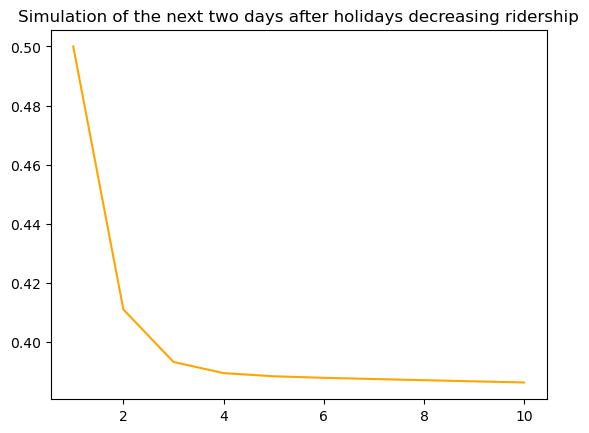

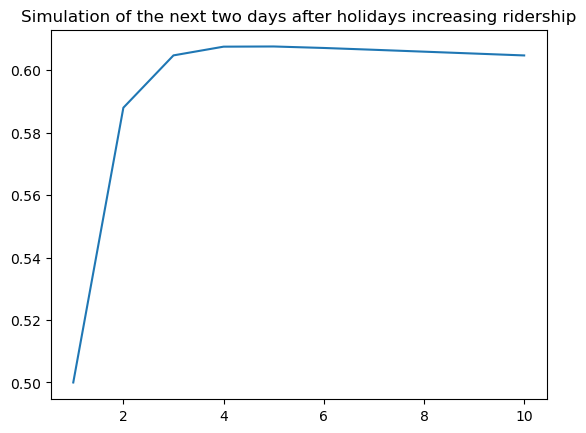

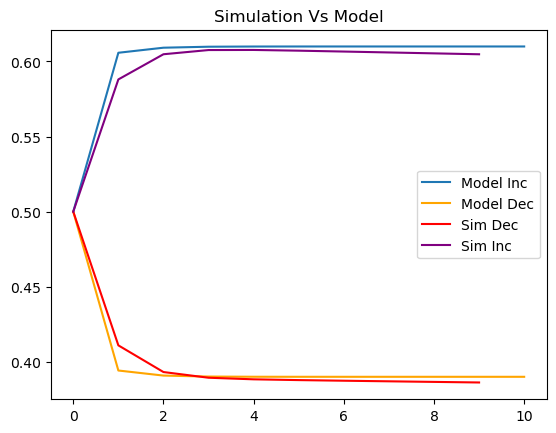

In [53]:
A = 50
B = 50
a = [0.50]
b = [0.50]
for i in range(1, 10):
    aa = A * 0.509
    ab = A * 0.49
    ba = B * 0.313
    bb = B * 0.686
    A = aa + ba
    B = ab + bb
    a.append(A/100)
    b.append(B/100)
    
    
plt.plot(range(1, 11), a, color="Orange")
plt.title('Simulation of the next two days after holidays decreasing ridership')
plt.show()
plt.plot(range(1, 11), b)
plt.title('Simulation of the next two days after holidays increasing ridership')
plt.show()

#++
plt.plot(range(len(pi)), pi[:,1])
#--
plt.plot(range(len(pi)), pi[:,0], color="Orange")
plt.plot(range(0, 10), a, color="Red")
plt.plot(range(0, 10), b, color="Purple")
plt.legend(['Model Inc', 'Model Dec', 'Sim Dec', 'Sim Inc'])
plt.title('Simulation Vs Model')
plt.show()